# Tabular Playground Series - Apr 2022

This is a notebook for Kaggle competition of tabular playground in April 2022. We are given 12 sensor data and based on those values, we need to perform a binary classification. Let's start!

## Import libraries: 

In [135]:
import scipy as sp
import pandas as pd
import numpy as np

# EDA (Exploratory Data Analysis)

### Check variables and observations in test and train data

#### Train data

In [136]:
df_train = pd.read_csv('train.csv')

In [137]:
df_train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [138]:
df_train.shape

(1558080, 16)

#### Test data

In [139]:
df_test = pd.read_csv('test.csv')

In [140]:
df_test.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


In [141]:
df_test.shape

(733080, 16)

#### Train_labels

In [142]:
df_train_labels = pd.read_csv('train_labels.csv')
df_train_labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In *train_labels* the variable *state* is associated with each sequence in train data

### Target distribution

It's important to have target normally distributed in regression model or to have all targets equally represented in classification problem. The reason for that is that the model will be more precise and accurate.

So when we have high skewness in data, we need to use log normal transformation to have skewness placed approximately to zero.

In [143]:
positive_state, negative_state = df_train_labels.state.value_counts()
print('There are {} positive and {} negative states'.format(positive_state, negative_state))

There are 13014 positive and 12954 negative states


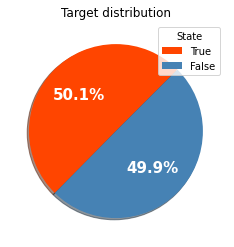

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie([positive_state, negative_state], labels=['True', 'False'], autopct='%1.1f%%', shadow=True, startangle=45, textprops=dict(color="white", fontsize=15, weight="bold"), colors=['orangered', 'steelblue'])
ax.set_title('Target distribution')
ax.legend(title='State')

As we see, the values of targets are equally distributed

### Input data

We need to check the following:
* The type of variables
* Are the values within the range (not applicable here)
* Explore missing values and use best technique for handling missing values

In [145]:
# Data types
df_train.dtypes

sequence       int64
subject        int64
step           int64
sensor_00    float64
sensor_01    float64
sensor_02    float64
sensor_03    float64
sensor_04    float64
sensor_05    float64
sensor_06    float64
sensor_07    float64
sensor_08    float64
sensor_09    float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
dtype: object

#### Categorical variables

Although we see that there are no categorical variables in this dataset, formally, by checking the `object` dtype, we can conclude whether a column has a text.

In [146]:
# return boolean array
s = (X_train.dtypes == 'int64')

# Get only indices as a list
object_cols = list(s[s].index)

print("Numer of categorical variables: {}".format(len(object_cols)))

Numer of categorical variables: 0


#### Check for NULL values

In [147]:
# Check for NULL values
df_train.isnull().sum().sum()

0

As we can see, there are no NULL values in our DataFrame

### Descriptive statistics 

In [148]:
# Describe values from that data frame
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sequence,1558080.0,12983.500000,7496.318295,0.000000,6491.750000,12983.500000,19475.250000,25967.000000
subject,1558080.0,331.633087,195.825657,0.000000,161.750000,335.000000,501.000000,671.000000
step,1558080.0,29.500000,17.318108,0.000000,14.750000,29.500000,44.250000,59.000000
sensor_00,1558080.0,0.000437,2.658684,-375.063369,-0.500000,-0.003091,0.484544,335.824575
sensor_01,1558080.0,-0.001035,4.404200,-434.597689,-0.483193,0.003151,0.492647,449.591387
sensor_02,1558080.0,-0.217805,2.298002,-31.659476,-0.646153,0.000000,0.333847,1.666667
sensor_03,1558080.0,-0.002157,3.934184,-408.376106,-0.492920,0.000000,0.489381,436.650442
sensor_04,1558080.0,-0.001829,1.683685,-23.626013,-0.472993,-0.001590,0.470156,24.872865
sensor_05,1558080.0,-0.001652,1.590818,-74.982797,-0.478684,0.002992,0.505610,77.915482
sensor_06,1558080.0,-0.000412,3.345143,-470.504554,-0.492714,0.000911,0.492714,442.500911


I want to know if every measurement has the same length (0 - 59 seconds)

I realize that I would actually need to group by sequence and subject to be able to measure steps

In [149]:
for observation in df_train.groupby(['sequence', 'subject']).size():
    if observation != 60:
        print('There is a sequence which is not 60 seconds long')

We can see that each sequence is 60 seconds long (which is great)

In [150]:
# I want to know how many participants are there?
df_train.reset_index().subject.nunique()

672

There are **672** participants in this data frame

I want to know how many times each subject had measurement

In [151]:
duration_of_measurement = 60 # In seconds
df_train['subject'].value_counts().sort_index() / duration_of_measurement

0       20.0
1      175.0
2       38.0
3       36.0
4       26.0
       ...  
667     62.0
668     21.0
669     25.0
670     28.0
671     60.0
Name: subject, Length: 672, dtype: float64

## The sensors

Firstly, we need to plot 13 boxplots with outliers to see the situation.

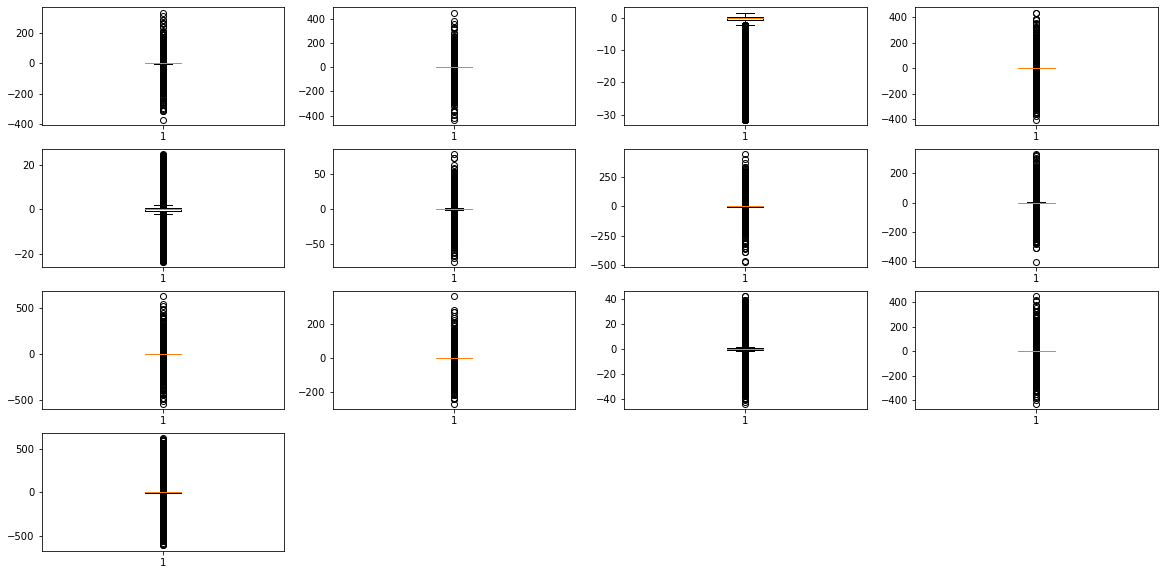

In [152]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
for index, sensor in enumerate(df_train.columns):
    if sensor.startswith('sensor'):
        plt.subplot(4,4, index - 2)
        plt.boxplot(df_train[sensor])

As we can see, the most sensors are defined by outliers. We can see that using boxplot might be kind of unpractical, because we have 1.5 million observations. That's why, we are using histograms

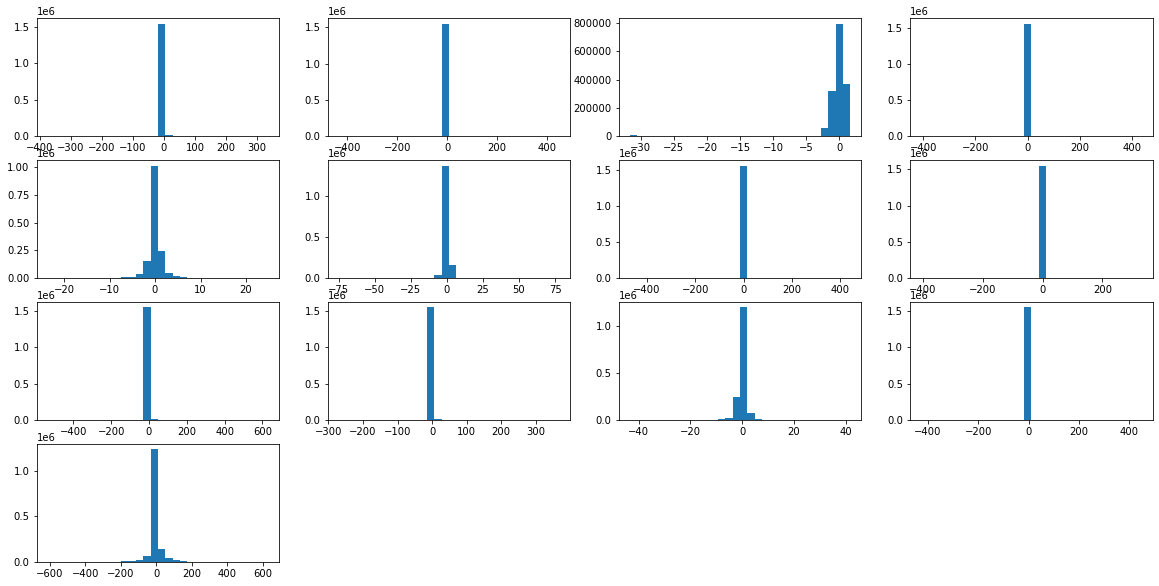

In [153]:
fig = plt.figure(figsize=(20,10))
for index, sensor in enumerate(df_train.columns):
    if sensor.startswith('sensor'):
        plt.subplot(4,4, index - 2)
        plt.hist(df_train[sensor], bins = 30)

Let's see the value of upper and lower bound for every sensor and it's outliers using the IQR method

In [154]:
# Create an empty data frame
index_labels = [col for col in df_train.columns if col.startswith('sensor')]
df_sensor_iqr = pd.DataFrame(columns=['upper_bound', 'lower_bound', 'mean', 'NumberOfOutliers'], index = index_labels)

for index, sensor in enumerate(df_train.columns):
    if sensor.startswith('sensor'):
        q1 = df_train[sensor].quantile(q = 0.25)
        q3 = df_train[sensor].quantile(q = 0.75)
        mean = df_train[sensor].mean()
        
        # IQR region
        IQR = q3 - q1
        
        # finding upper and lower whiskers
        upper_bound = q3 + (1.5 * IQR)
        lower_bound = q1 - (1.5 * IQR)
        
        # Number of outliers
        count_outliers = df_train[(df_train[sensor] <= lower_bound) | (df_train[sensor] >= upper_bound)]
        
        df_sensor_iqr.loc[index_labels[index - 3]] = [upper_bound, lower_bound, mean, count_outliers.shape[0]]
        
df_sensor_iqr

,upper_bound,lower_bound,mean,NumberOfOutliers
sensor_00,1.96136,-1.976816,0.000437,148564
sensor_01,1.956408,-1.946954,-0.001035,145841
sensor_02,1.803847,-2.116153,-0.217805,26260
sensor_03,1.962832,-1.966372,-0.002157,139672
sensor_04,1.88488,-1.887717,-0.001829,207280
sensor_05,1.982049,-1.955123,-0.001652,210965
sensor_06,1.970856,-1.970856,-0.000412,134812
sensor_07,1.965267,-1.982824,-0.000026,152292
sensor_08,2.0,-2.0,-0.00013,161401
sensor_09,2.044436,-2.050939,0.001366,166545


As we can see, we cannot just 'delete' outliers. Some sensors (like sensor_12) have almost 30% of the values out of interquartile range.
IQR (Interquartile range) is a measure of statistical dispersion. There are 50% of all values within IQR, while also 99.3% od data within upper and lower bound.

Let's plot the number of outliers (use barplot):

<AxesSubplot:ylabel='NumberOfOutliers'>

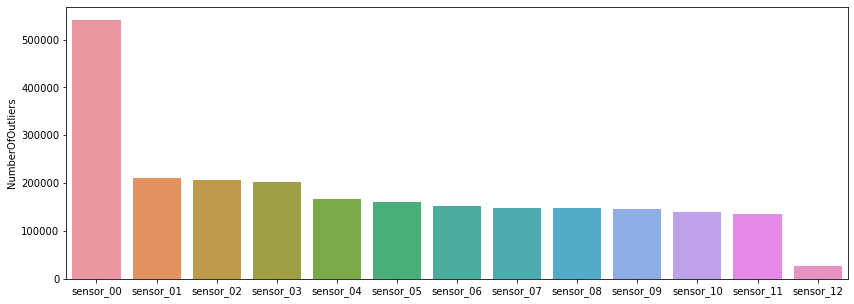

In [155]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,5))

sns.barplot(x = df_sensor_iqr.index, y=df_sensor_iqr.NumberOfOutliers.sort_values(ascending=False))

In [156]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg')

This notebook: https://www.kaggle.com/code/ambrosm/tpsapr22-eda-which-makes-sense suggest to use some kind of non-linear transformation to get it to the normal distribution

#### *NOTE* : Mahalanobis distance

The best practice for dealing with outliers in multivariante statistics is to use Mahalanobis distance. I had two approaches with dealing with the outliers.

The first one is to implement Mahalanobis distance by myself and to add a new variable for each observation and detect outliers. This approach didn't work because there weren't enough memory space as the implementation is quite memory consuming.

The second approach is to use already implemented `mahalanobis` function in **R** language. However, the version of the package *rpy2* which serves as an interface to **R** is deprecated in Anaconda and cannot be used.  

### Correlation between sensors

<AxesSubplot:>

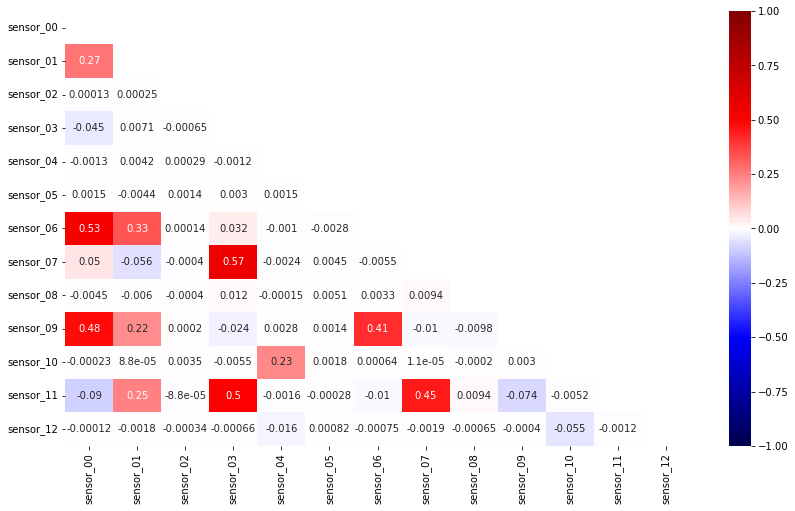

In [157]:
fig, ax = plt.subplots(figsize=(14, 8))

sensors = [column for column in df_train.columns if column.startswith('sensor')]

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train[sensors].corr(), dtype=np.bool_))

sns.heatmap(df_train[sensors].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')

As we can see, the strongest positive correlation is between (*sensor_00*, *sensor_06*), (*sensor_00, sensor_09*), (*sensor_03*, *sensor_07*), (*sensor_03, sensor_11*)

### Feature engineering

As we have more than 1.5 million observations, it would be memory efficicient to remove highly correlated variables which would not have such an impact on our training model. 

In [158]:
# Drop values of specific columns
df_train = df_train.drop(['sensor_06', 'sensor_07', 'sensor_09', 'sensor_11'], axis = 1)
df_test = df_test.drop(['sensor_06', 'sensor_07', 'sensor_09', 'sensor_11'], axis = 1)

<AxesSubplot:>

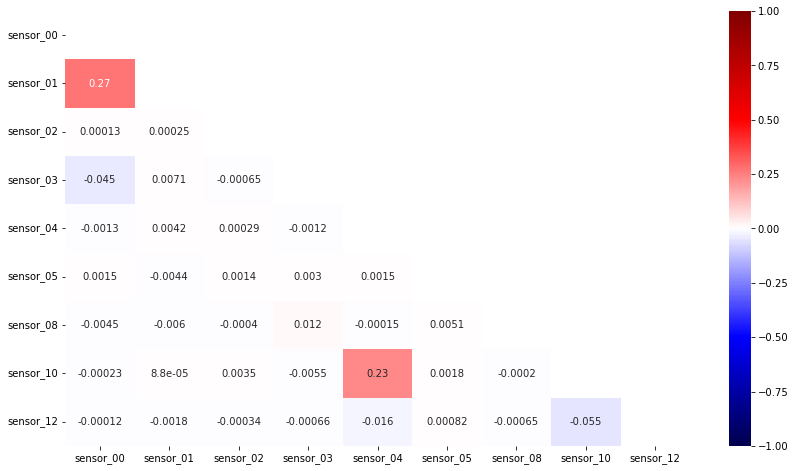

In [159]:
fig, ax = plt.subplots(figsize=(14, 8))

sensors = [column for column in df_train.columns if column.startswith('sensor')]

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train[sensors].corr(), dtype=np.bool_))

sns.heatmap(df_train[sensors].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')

# Feature extraction

*NOTE*: This part is based on https://www.kaggle.com/code/reymaster/apr-2022-tps-simple-time-series-analysis-xgboost notebook

We are using *tsfresh* package for feature extraction. *tsfresh* is very convenient in this situation because it enables us to summarize variable's values based on a sequence number (a.k.a. it enables us a summary statistics for each observation which we got by grouping it by some other variable). Also, when we will train the model, the shape of training set and training labels will be the same which is suitable for our case.

In [160]:
from tsfresh.feature_extraction import extract_features, MinimalFCParameters

In [161]:
# Return the train_X which contains summary statistics for each variable group by sequence variable
train_X = extract_features(df_train, default_fc_parameters=MinimalFCParameters(), column_id="sequence", column_sort="step")

# Same here
test_X = extract_features(df_test, default_fc_parameters=MinimalFCParameters(), column_id="sequence", column_sort="step")

Feature Extraction: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


In [162]:
train_X;

In [163]:
test_X;

### Impuation methods

`extract_feature` also produces NaN values which were created by feature calculators that can not be used on the given data, e.g., because the statistics are too low.

Although `.info()` method stated that there are no NaN values in our data, we will perform imputation for educational purpose.

In [164]:
#train_X.info();

The best way to perform impuation in *R* is to use MICE package. In python, there are no such complicated impuation methods (or there are still in experimental status). That's why we are using `SimpleImputer` to to replace missing values with the median value along each column. 

In [165]:
from sklearn.impute import SimpleImputer

# Use median for imputation
simple_imputer = SimpleImputer(strategy = 'median')

# Save column names as imputation is removing them
column_names = train_X.columns

train_X = pd.DataFrame(simple_imputer.fit_transform(train_X))
test_X = pd.DataFrame(simple_imputer.transform(test_X))

# Imputation removed column names; put them back
train_X.columns = column_names
test_X.columns = column_names

### Select relevant features

In [166]:
from tsfresh import select_features

# Get the state values of train_labels (using for selecting the features)
y = pd.Series(df_train_labels.state)

In [167]:
# Select features which might be interesting (select appropriate columns)
X_train_selected = select_features(train_X, y)
X_train_selected

,sensor_02__standard_deviation,sensor_02__variance,sensor_02__maximum,sensor_08__maximum,sensor_04__maximum,sensor_08__minimum,sensor_08__variance,sensor_08__standard_deviation,sensor_08__root_mean_square,sensor_04__minimum,...,subject__median,subject__mean,subject__sum_values,sensor_01__median,sensor_03__sum_values,sensor_03__mean,sensor_00__sum_values,sensor_00__mean,sensor_01__sum_values,sensor_01__mean
0,0.137143,0.018808,1.000000,2.3,0.971886,-1.7,0.726497,0.852348,0.852936,-1.604398,...,47.0,47.0,2820.0,0.191702,2.052212,0.034204,2.504637,0.041744,-0.781513,-0.013025
1,0.487898,0.238044,-0.666153,2.3,3.661950,-3.0,1.190208,1.090967,1.093542,-1.417513,...,66.0,66.0,3960.0,0.001576,7.209735,0.120162,-4.157651,-0.069294,-1.197479,-0.019958
2,0.168910,0.028530,-0.666153,4.6,5.368985,-5.0,2.853567,1.689250,1.689280,-8.250281,...,66.0,66.0,3960.0,0.120273,-1.487611,-0.024794,-0.092736,-0.001546,1.500000,0.025000
3,0.195813,0.038343,1.000000,5.0,0.543682,-5.7,3.879808,1.969723,1.970237,-0.698962,...,542.0,542.0,32520.0,0.051471,2.008850,0.033481,1.792117,0.029869,-2.950630,-0.049177
4,0.163504,0.026734,1.333333,2.8,1.485148,-1.7,0.958475,0.979017,0.980561,-1.124221,...,437.0,437.0,26220.0,0.060399,-3.376106,-0.056268,3.547913,0.059132,0.894958,0.014916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,0.359176,0.129008,1.000000,4.8,0.569240,-4.7,2.990497,1.729305,1.730655,-0.759101,...,558.0,558.0,33480.0,-0.088235,-0.101770,-0.001696,6.046368,0.100773,0.424370,0.007073
25964,0.148380,0.022017,-0.332820,30.1,1.788025,-19.2,81.063489,9.003526,9.003536,-1.582502,...,297.0,297.0,17820.0,0.003151,1.292920,0.021549,1.030912,0.017182,0.288866,0.004814
25965,0.215224,0.046321,-0.332820,2.3,2.199944,-2.3,1.113456,1.055204,1.055462,-2.813053,...,129.0,129.0,7740.0,-0.025210,-0.508850,-0.008481,-0.387944,-0.006466,0.266807,0.004447
25966,0.323106,0.104398,0.055085,3.9,2.669851,-4.0,1.059364,1.029254,1.029644,-3.565188,...,170.0,170.0,10200.0,0.213235,-2.187611,-0.036460,-2.425039,-0.040417,0.195378,0.003256


In [168]:
# Select the same columns for test data (on which we will make predictions)
X_test_selected = test_X[X_train_selected.columns]

We have two DataFrames - *X_train_selected* and *X_test_selected*. Both frames have same variables which are relevant features extracted from basic statistics provided by *tsfresh* package. 

# XGBoost

Gradient boosting is a ensemble method that combine predictions of several models. XGBoost is an *extreme* GB which provides additional features focused on speed and performance. 

In [169]:
from xgboost import XGBClassifier

### Model creation

***NOTE***: in this scenario, we don't use cross-validation as our dataset is classified as *large* (1.5 million observations). We have sufficient data to fit the model on training set and evaluate it on test set. Here, we can use cross-validation only for educational purposes.

In [170]:
from sklearn.model_selection import train_test_split

# Split matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y)

#### Parameter tuning

In `XGBClassifier` class, we used few parameters:
- `n_estimators` - the number of models we include in the ensemble
- `early_stopping_rounds` - stop iteration after validation score stops inproving
- `learning_rate` - size of the step in every iteration
- `n_jobs` - equal to number of cores on the machine

In [171]:
from xgboost import XGBClassifier

# Create the model
model = XGBClassifier(n_estimators = 1000, 
                      early_stopping_rounds = 5, 
                      learning_rate = 0.05, 
                      n_jobs = 2)

In [172]:
%%time

# Fit the model with X_train and y_train data 
model.fit(X_train, 
          y_train,
          eval_set=[(X_test, y_test)], 
          verbose=False)

CPU times: user 1min 25s, sys: 40.5 ms, total: 1min 25s
Wall time: 43 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=2, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model evaluation

We use confusion matrix and F1 score to evaluate the model

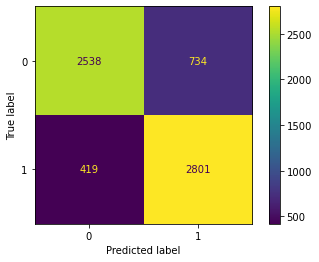

In [173]:
from sklearn.metrics import f1_score, plot_confusion_matrix

# Create confusion matrix
plot_confusion_matrix(model, X_test, y_test)

# Make prediction based on test_X
xgb_prediction = model.predict(X_test)

In [174]:
# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, xgb_prediction)}")

F1 Score of the classifier is: 0.8293116210214655


### Prediction

In [175]:
prediction_values = model.predict(X_test_selected)

# Submission

In [176]:
sample_sub = pd.read_csv("sample_submission.csv")

submission = pd.DataFrame({
    "sequence" : sample_sub.sequence,
    "state" : prediction_values
})

submission.to_csv("submission.csv", index=False)